# Note: For every question under every exercise, create a markdown cell and name it "Question 1", "Question 2", ...

# Imagine scikit-learn's library is not public anymore and you were asked to build $k$-means from scratch

In the context of the <a href="https://www.kaggle.com/datasets/shwetabh123/mall-customers?select=Mall_Customers.csv">Mall Customers</a> dataset, which contains contains the basic information (ID, age, genre, income, spending score) about the customers of a mall. We want to cluster the customers according to their ``Annual Income`` and ``Spending Score`` as our data.

1) Plot the distribution of the features `Age`, `Annual Income`, and `Spending Score`. You can use `matplotlib` and `seaborn`. Figures should look something similar to this:
<img src="DistPlot.png" height="800px" width="800px">

2) Build $k$-means from scratch, then set $k=5$ to find the clusters and plot them. They should look something like this:
<img src="ClustersofCustomers.png" height="500px" width="500px">

3) Should $k$ be set to $5$, or another value? To answer this question, compute the WCSS (Within-Cluster Sums of Squares) and use the elbow method by plotting WCCS, using the $k$-means of the sklearn library.

## Question 1

In [2]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("Mall_Customers.csv")
data.head()



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


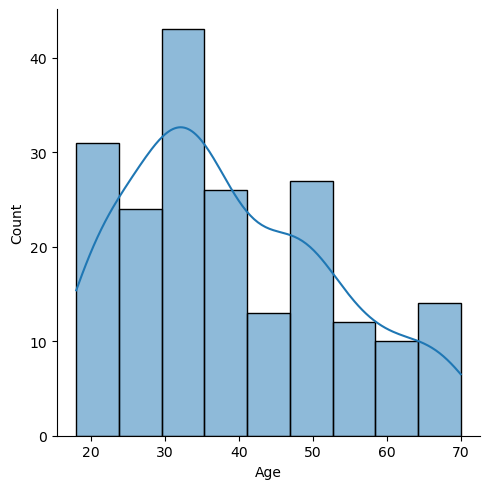

In [3]:
sns.displot(data.Age, kde= True)

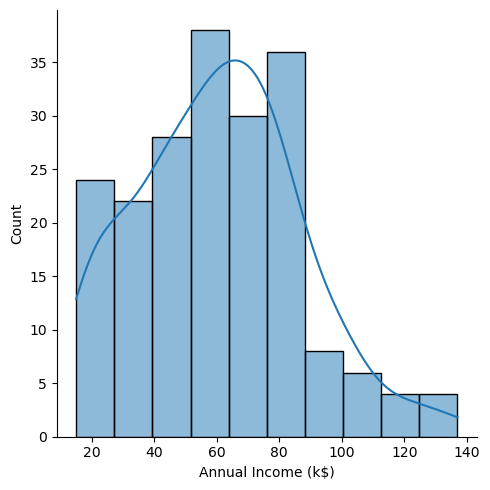

In [4]:
sns.displot(data["Annual Income (k$)"], kde = True)

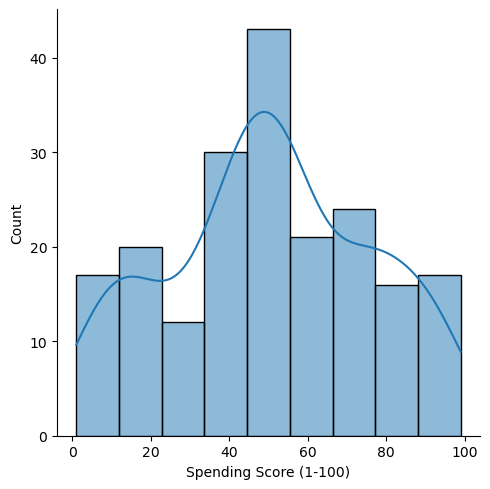

In [5]:
sns.displot(data["Spending Score (1-100)"], kde = True)

## Question 2

In [6]:
import math
import random
import copy


def k_means(k, data) : 
    different = True 
    clusters = [0] * len(data)
    n = 1
    
    #initalisation

    min_x = min(p[0] for p in data)
    max_x = max(p[0] for p in data)
    min_y = min(p[1] for p in data)
    max_y = max(p[1] for p in data)

    centroides = [[random.uniform(min_x, max_x), random.uniform(min_y, max_y)] for _ in range(k)]

    print(centroides)
        
    while different == True : 
        print('Step :', n)
        centroides_temp = copy.deepcopy(centroides)
        for i in range (len(data)) : 
            distances = []
            for j in range (k) : 
                distance = math.sqrt((data[i][0]-centroides[j][0])**2 + (data[i][1]-centroides[j][1])**2)
                distances.append([distance,j]) 
            minimum = min(distances, key=lambda x: x[0])[1]   
            clusters[i] = minimum
 
    
        for i in range(k) : 
            cluster = []
            print(cluster)
            for j in range (len(data)) :
                if i == clusters[j] :
                    cluster.append(data[j])
            if len(cluster) > 0:
                somme_x = sum(p[0] for p in cluster)
                somme_y = sum(p[1] for p in cluster)
                centroides[i] = [somme_x / len(cluster), somme_y / len(cluster)]
            else:
                centroides[i] = [random.uniform(0, 10), random.uniform(0, 10)]
            
        print(centroides)   
            
              
        if centroides == centroides_temp :
            different = False    
                       
        n += 1  
                
    return(centroides, clusters)

data = data = [
    [1, 2],
    [1, 3],
    [0, 2],
    [0, 3],
    [8, 8],
    [9, 8],
    [8, 9],
    [9, 9]
]

centroides, clusters = k_means(5, data)
print(centroides, '\n', clusters)

[[4.799804790103122, 5.3619560927446805], [4.449135336982758, 5.61016293248008], [6.453494142168644, 6.380587736616835], [2.213676464229917, 7.281633039760047], [8.196487159718359, 5.278262814813799]]
Step : 1
[]
[]
[]
[]
[]
[[7.253365357348099, 5.409005935738454], [1.0, 2.5], [8.333333333333334, 8.666666666666666], [0.0, 2.5], [9.0, 8.0]]
Step : 2
[]
[]
[]
[]
[]
[[5.216898960521702, 5.32231125101549], [1.0, 2.5], [8.333333333333334, 8.666666666666666], [0.0, 2.5], [9.0, 8.0]]
Step : 3
[]
[]
[]
[]
[]
[[8.805893535333553, 5.009304741628947], [1.0, 2.5], [8.333333333333334, 8.666666666666666], [0.0, 2.5], [9.0, 8.0]]
Step : 4
[]
[]
[]
[]
[]
[[4.725173103983553, 5.448825000194926], [1.0, 2.5], [8.333333333333334, 8.666666666666666], [0.0, 2.5], [9.0, 8.0]]
Step : 5
[]
[]
[]
[]
[]
[[7.258346355969813, 3.314978537809422], [1.0, 2.5], [8.333333333333334, 8.666666666666666], [0.0, 2.5], [9.0, 8.0]]
Step : 6
[]
[]
[]
[]
[]
[[0.6256107539680955, 8.823081732472401], [1.0, 2.5], [8.33333333333333

[[101.16367113479059, 23.358015915850988], [81.57108341733148, 34.67621474765843], [57.85033807770334, 78.61227772771272], [15.479467320301445, 16.83145470116716], [68.5489028497139, 59.26039998285969]]
Step : 1
[]
[]
[]
[]
[]
[[102.0, 22.45], [76.0, 21.714285714285715], [50.4, 81.91111111111111], [26.304347826086957, 20.91304347826087], [61.57142857142857, 54.59340659340659]]
Step : 2
[]
[]
[]
[]
[]
[[112.35714285714286, 33.57142857142857], [78.37037037037037, 17.555555555555557], [53.15909090909091, 83.61363636363636], [26.304347826086957, 20.91304347826087], [59.55434782608695, 53.65217391304348]]
Step : 3
[]
[]
[]
[]
[]
[[113.26666666666667, 44.6], [79.67857142857143, 16.535714285714285], [56.8125, 83.35416666666667], [26.304347826086957, 20.91304347826087], [56.395348837209305, 51.46511627906977]]
Step : 4
[]
[]
[]
[]
[]
[[112.28571428571429, 54.857142857142854], [82.19354838709677, 16.516129032258064], [59.26, 82.9], [26.304347826086957, 20.91304347826087], [53.951219512195124, 5

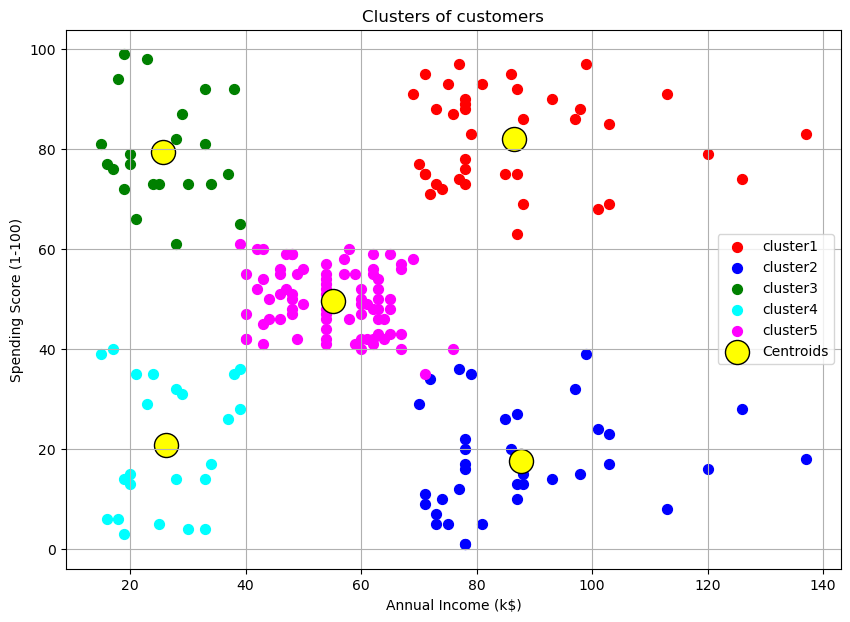

In [7]:
import matplotlib.pyplot as plt

df = pd.read_csv("Mall_Customers.csv")

data2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].values.tolist()


# Exécution de ton k-means
centroides, clusters = k_means(5, data2)

# Couleurs pour chaque cluster (max 5 ici)
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

# Affichage des points par cluster
plt.figure(figsize=(10, 7))

for i in range(5):  # pour chaque cluster
    points = [data2[j] for j in range(len(data2)) if clusters[j] == i]
    if points:  # éviter les clusters vides
        xs, ys = zip(*points)
        plt.scatter(xs, ys, c=colors[i], label=f'cluster{i+1}', s=50)

# Affichage des centroïdes
for c in centroides:
    plt.scatter(c[0], c[1], c='yellow', s=300, edgecolors='black', label='Centroids')

# Éviter la légende "Centroids" répétée 5 fois :
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(unique_labels.values(), unique_labels.keys())

# Titre et axes
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()


## Question 3

c:\Users\sassi\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


269981.28
181363.595959596
106348.3730621112
73679.78903948834
44448.45544793371
37265.86520484346
30259.65720728547
25095.703209997544
21830.041978049434
20736.67993892412
17702.595932296277
15810.838613705502
14763.330402558206
13165.329070181626
12064.939000692291
10788.847033763339
10585.021275946276
9071.935658374023
8566.599192715497
8107.89923039923


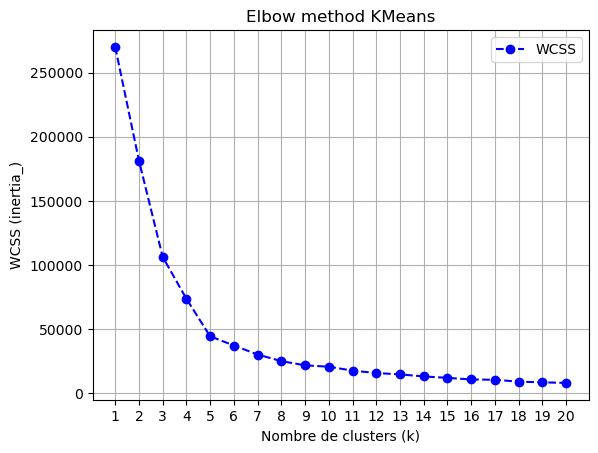

In [8]:
from sklearn.cluster import KMeans 

elbow = []

for i in range (1,21) :
    kmeans = KMeans(n_clusters=i, random_state=0).fit(data2)
    print(kmeans.inertia_)
    elbow.append([i, kmeans.inertia_])
    
x = [point[0] for point in elbow]  # les k
y = [point[1] for point in elbow]  # les WCSS    
    
plt.plot(x, y, color='blue', marker='o', linestyle='--', label='WCSS')
plt.title('Elbow method KMeans')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('WCSS (inertia_)')
plt.grid(True)
plt.xticks(x)  # Pour afficher tous les k sur l'axe x
plt.legend()
plt.show()
    

# Hierarchical Clustering

Using the same dataset in the previous exercise (Mall Customers):

1) Build the dendrogram using `dendrogram = sch.dendrogram(sch.linkage(df, method  = "average"))` which can be imported from `import scipy.cluster.hierarchy as sch`. 💡Hint: You should convert the feature `Genre` to a binary feature. The dendrogram should look something like this: 
<img src="Dendrogram.png" height="600px" width="600px">



2) Conduct hierarchical clustering using `from sklearn.cluster import AgglomerativeClustering` with the following parameters `n_clusters = 5, affinity = 'euclidean', linkage ='average'` then show the labels of the each row.

3) Plot the clusters. Are they similar to the ones identified by $k$-means?

## Question 1

(200, 2)
['Genre_Female' 'Genre_Male']


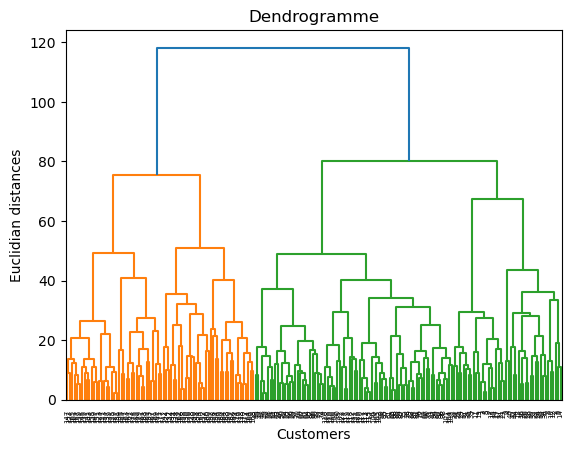

In [9]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Mall_Customers.csv')

enc = OneHotEncoder( sparse=False)


encoded = enc.fit_transform(df[["Genre"]])
print(encoded.shape)
print(enc.get_feature_names_out(["Genre"]))


encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out(["Genre"]))

df = df.drop('Genre', axis=1)


df = pd.concat([df, encoded_df], axis=1)

# Dendrogramme
dendrogram = sch.dendrogram(sch.linkage(df, method="average"))
plt.title("Dendrogramme")
plt.xlabel("Customers")
plt.ylabel("Euclidian distances")
plt.show()


## Question 2

In [10]:
from sklearn.cluster import AgglomerativeClustering


hierarchical = AgglomerativeClustering(n_clusters=5, affinity= 'euclidean', linkage= 'average')

hierarchical.fit(df)

df['Classification'] = hierarchical.labels_

df.head()



,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,Classification
0,1,19,15,39,0.0,1.0,3
1,2,21,15,81,0.0,1.0,4
2,3,20,16,6,1.0,0.0,3
3,4,23,16,77,1.0,0.0,4
4,5,31,17,40,1.0,0.0,3


## Question 3

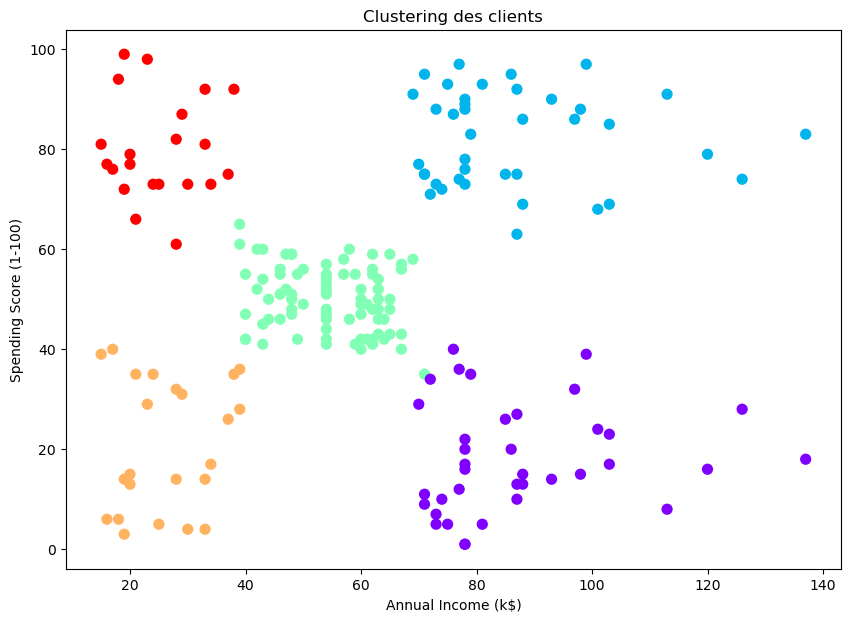

In [11]:
plt.figure(figsize=(10, 7))

plt.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['Classification'],
    s=50,
    cmap='rainbow'
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Clustering des clients")
plt.show()


Not the same results compare to kmeans

# Gaussian Mixture Model vs. $k$-means

1) Generate data with the following code:
```python
import numpy as np
import matplotlib.pyplot as plt

n_samples = 1000

varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[5, 1, 0.5],
                             random_state=3)
X, y = varied[0], varied[1]

plt.figure( figsize=(16,12))
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()
```

2) Apply $k$-means using scikit-learn's `KMeans` using `from sklearn.cluster import KMeans` with `k=3`. Plot the clusters.

3) Apply the Gaussian Mixture Model's using using `from sklearn.mixture import GaussianMixture` with `n_components = 3`. Plot the clusters.

4) From the two plotted clusters, which model preserves the initial figure generated in question 1?

## Question 1

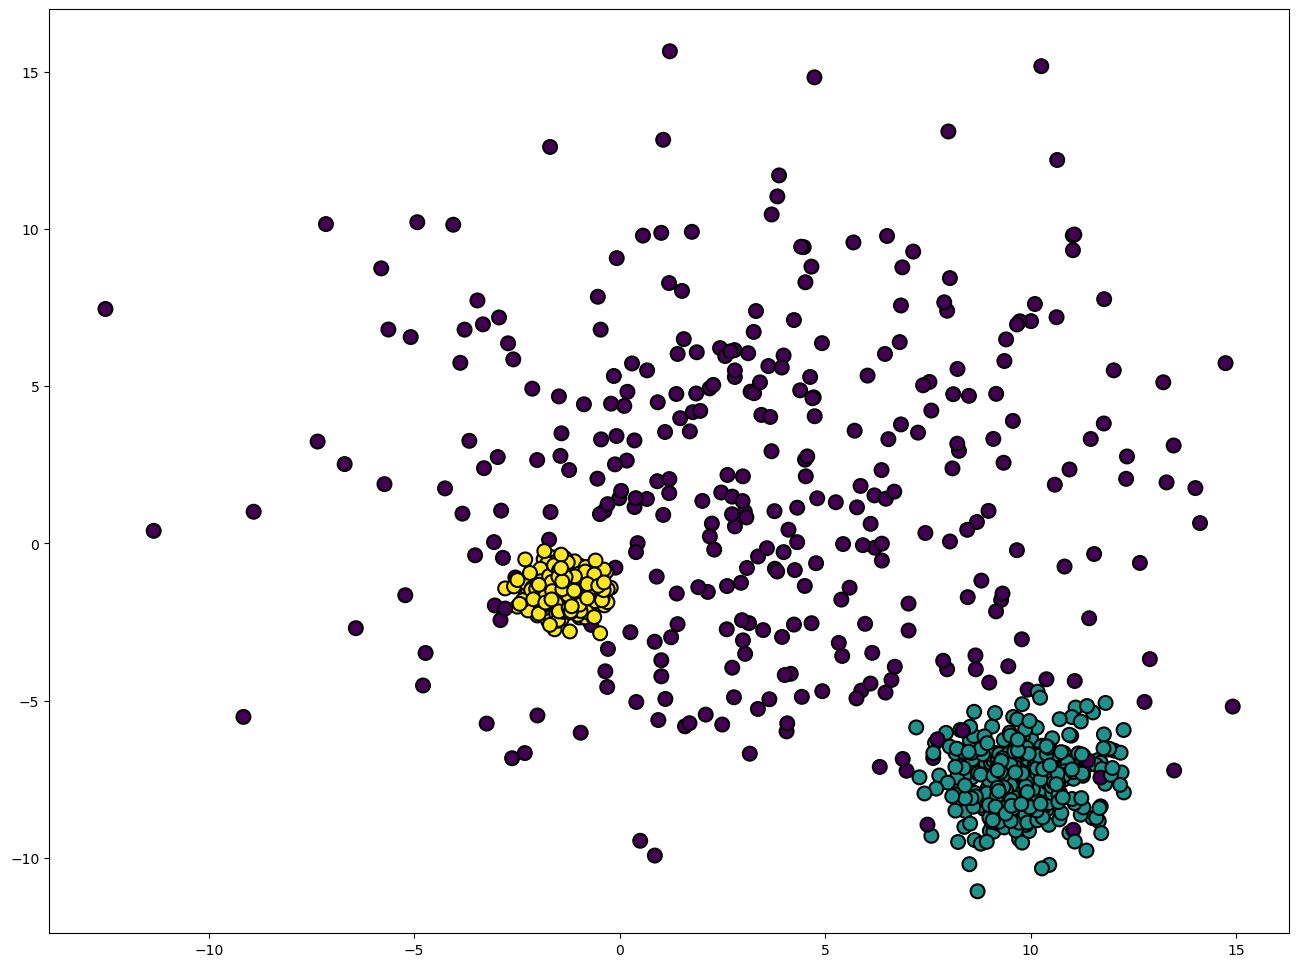

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


n_samples = 1000

varied = datasets.make_blobs(n_samples = n_samples, cluster_std = [5,1,0.5])

X, y = varied[0], varied[1]

plt.figure(figsize=(16,12))

plt.scatter(X[:,0],X[:,1], c = y, edgecolors= 'black', lw = 1.5, s= 100, cmap= plt.get_cmap('viridis') )


## Question 2

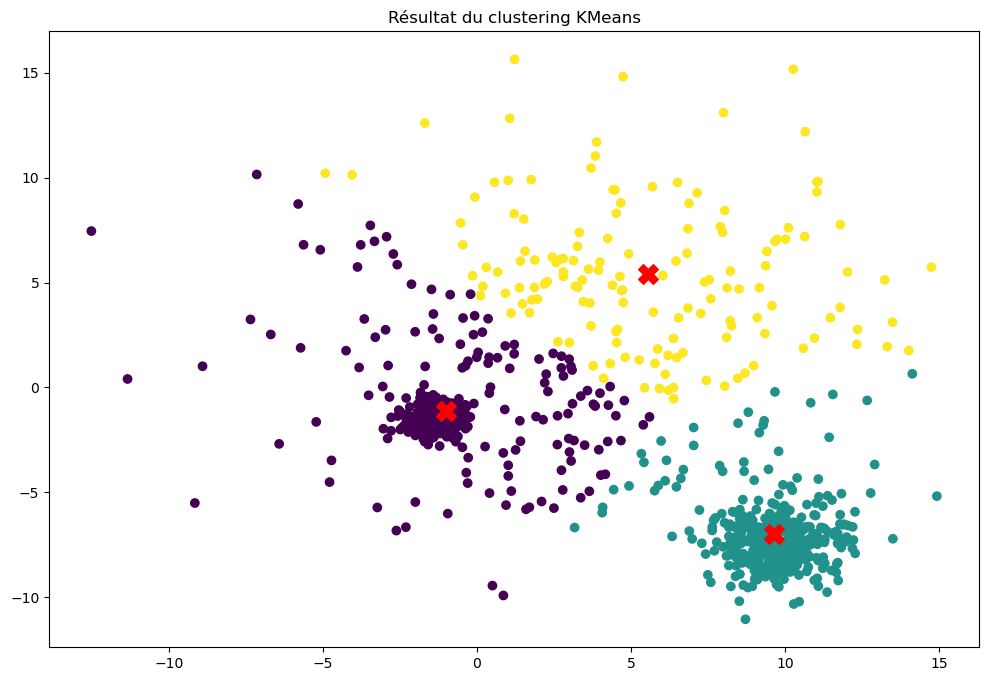

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 3)

kmeans.fit(X)

labels = kmeans.labels_

centroids = kmeans.cluster_centers_

plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')  # points colorés selon leur cluster
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')  # centres en rouge
plt.title("Résultat du clustering KMeans")
plt.show()




## Question 3

[[-1.32548681 -1.46609043]
 [ 9.82090744 -7.38607808]
 [ 3.48326218  1.77002083]]


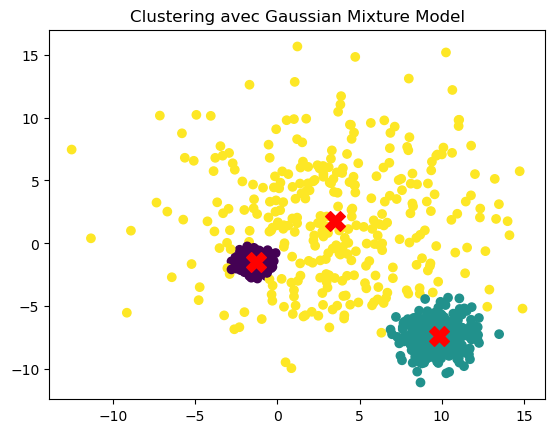

In [19]:
from sklearn.mixture import GaussianMixture

Gaussianmixture = GaussianMixture(n_components=3)

Gaussianmixture.fit(X)

labels = Gaussianmixture.predict(X)

print(Gaussianmixture.means_)

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(Gaussianmixture.means_[:, 0], Gaussianmixture.means_[:, 1], 
            s=200, c='red', marker='X')
plt.title("Clustering avec Gaussian Mixture Model")
plt.show()



## Question 4

Gaussian Mixture conserve the plot of the first question better than KMeans